In [1]:
%matplotlib inline
import sys
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False

# 운영체제별로 기본 폰트가 다릅니다.
if "darwin" in sys.platform:
    plt.rcParams['font.family'] = 'AppleGothic'  # 맥 기본 폰트
elif "win" in sys.platform:
    plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 폰트
else:
    print(f"{sys.platform}은 폰트 직접 지정이 필요합니다.")  # 윈도우/맥 외에 리눅스 등의 플랫폼
    sys.exit(1)

from tqdm import tqdm                     # NOTE: tqdm_notebook은 deprecated되었구요. tqdm으로 사용하시면 됩니다.
from libs import stock_daum, stock_naver  # local libraries

## KOSPI 200 크롤링하기

In [2]:
df_list = []
for page_df in tqdm(stock_naver.get_kospi200('KPI200', 600)):  # NOTE: tqdm_notebook은 deprecated 되었으니, tqdm으로 대체합니다.
    df_list.append(page_df)

kpi200_df = pd.concat(df_list)
print(kpi200_df.shape)
kpi200_df.head()

600it [03:02,  3.29it/s]

(3600, 5)


,체결가,전일비,등락률,거래량(천주),거래대금(백만)
2024-10-07,347.34,5.60,+1.64%,141506.0,9044080.0
2024-10-04,341.74,1.02,+0.30%,127723.0,8710418.0
2024-10-02,340.72,4.04,-1.17%,133719.0,8461423.0
2024-09-30,344.76,9.17,-2.59%,142545.0,9477087.0
2024-09-27,353.93,2.51,-0.70%,142245.0,9804109.0


## S&P 500 크롤링하기

+ http://finance.daum.net/global/quotes/US.

In [3]:
df_list = []
for page_df in tqdm(stock_daum.get_us_sp500()):  # NOTE: tqdm_notebook은 deprecated 되었으니, tqdm으로 대체합니다.
    df_list.append(page_df)

us_sp500_df = pd.concat(df_list)
print(us_sp500_df.shape)
us_sp500_df.head()

50it [00:31,  1.61it/s]

(4973, 16)


,symbolCode,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume,listedSharesCount
date,,,,,,,,,,,,,,,,
2024-10-04,US.SP500,5751.07,19:28:26,RISE,51.13,0.0090,5699.94,,5737.48,5753.21,5702.83,0.0,2167312382,0.0,2167312382,None
2024-10-03,US.SP500,5699.94,19:28:26,FALL,-9.60,-0.0017,5709.54,,5698.19,5718.78,5677.37,0.0,2169165910,0.0,2169165910,None
2024-10-02,US.SP500,5709.54,19:28:26,RISE,0.79,0.0001,5708.75,,5698.14,5719.63,5674.00,0.0,2175966181,0.0,2175966181,None
2024-10-01,US.SP500,5708.75,19:28:26,FALL,-53.73,-0.0093,5762.48,,5757.73,5757.73,5681.28,0.0,2520783375,0.0,2520783375,None
2024-09-30,US.SP500,5762.48,19:28:26,RISE,24.31,0.0042,5738.17,,5726.52,5765.14,5703.53,0.0,2470155252,0.0,2470155252,None


## 한 Axes에 그리기

<Axes: xlabel='date'>

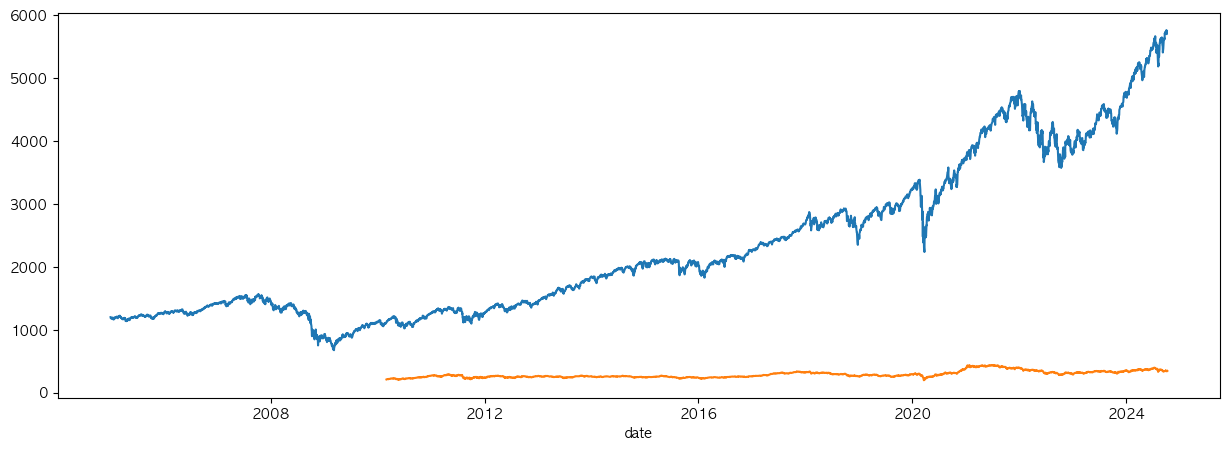

In [4]:
# 한 AX에 그리기
ax = us_sp500_df['tradePrice'].plot(figsize=(15, 5))
kpi200_df['체결가'].plot(figsize=(15, 5), ax=ax)

In [5]:
df = pd.DataFrame({
    'kpi200': kpi200_df['체결가'],
    'us_sp500': us_sp500_df['tradePrice'],
})
print(df.shape)
df.head()

(5087, 2)


,kpi200,us_sp500
2005-01-03,NaN,1202.1
2005-01-04,NaN,1188.0
2005-01-05,NaN,1183.7
2005-01-06,NaN,1187.9
2005-01-07,NaN,1186.2


<Axes: >

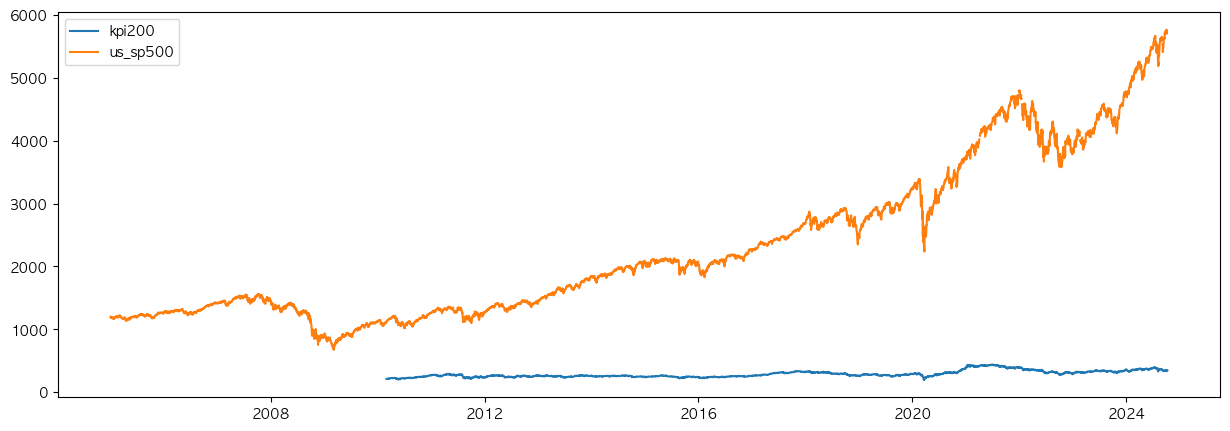

In [6]:
df.plot(figsize=(15, 5))

## 단위가 다른 2개 차트를 Ratio로 표현하여 맞추기

In [7]:
시작가 = kpi200_df.loc[:, '체결가'].iloc[0]
kpi200_ratio_series = 100 * kpi200_df.loc[:, '체결가'] / 시작가

In [8]:
시작가 = us_sp500_df['tradePrice'].iloc[0]
us_sp500_ratio_series = 100 * us_sp500_df['tradePrice'] / 시작가

In [9]:
df = pd.DataFrame({
    'kpi200': kpi200_ratio_series,
    'us_sp500': us_sp500_ratio_series,
})
print(df.shape)
df.head()

(5087, 2)


,kpi200,us_sp500
2005-01-03,NaN,20.902197
2005-01-04,NaN,20.657026
2005-01-05,NaN,20.582257
2005-01-06,NaN,20.655287
2005-01-07,NaN,20.625727


<Axes: >

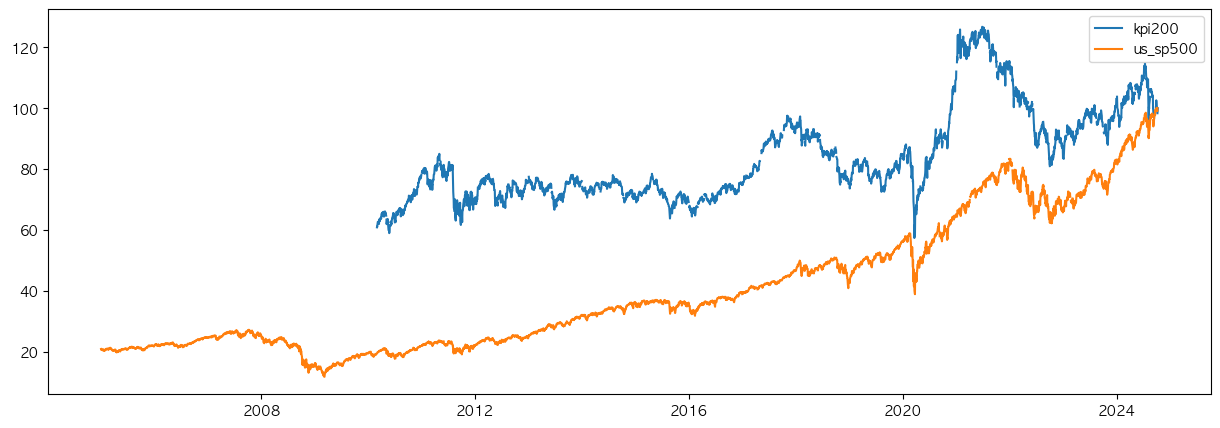

In [10]:
df.plot(figsize=(15, 5))